In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_risk_df = pd.read_csv('Data_BD_181ric090.csv')

#### Izpētes datu analīze 

In [3]:
credit_risk_df.head()

,PersID,Creating_Date,Reference_Date,Target,Predictor_1,Predictor_2,Predictor_3,Predictor_4,Predictor_5,Predictor_6,...,Predictor_70,Predictor_71,Predictor_72,Predictor_73,Predictor_74,Predictor_75,Predictor_76,Predictor_77,Predictor_78,Predictor_79
0,378197,10/04/25,10/04/24,0,1.0,4.0,320.00,80.000,0.00,0.0,...,NaN,NaN,NaN,NaN,12.0,5.0,4.0,NaN,NaN,NaN
1,138159,10/04/25,10/04/24,0,2.0,5.0,22087.09,4417.418,0.00,0.0,...,NaN,NaN,NaN,NaN,15.0,3.0,4.0,NaN,2.0,2.0
2,476747,10/04/25,10/04/24,0,1.0,1.0,2000.00,2000.000,2070.63,1.0,...,NaN,NaN,NaN,NaN,46.0,35.0,5.0,NaN,NaN,NaN
3,628396,10/04/25,10/04/24,1,1.0,1.0,1100.00,1100.000,567.79,1.0,...,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN
4,1127866,10/04/25,10/04/24,0,1.0,0.0,0.00,0.000,0.00,1.0,...,NaN,NaN,NaN,NaN,6.0,1.0,2.0,NaN,NaN,NaN


In [4]:
print('Datu kopas izmērs: ', credit_risk_df.shape)

Datu kopas izmērs:  (70000, 83)


In [5]:
credit_risk_df = credit_risk_df.drop(columns = ['PersID', 'Creating_Date', 'Reference_Date'])

In [6]:
print('Datu kopas atribūtu datu tipi: ', credit_risk_df.dtypes.value_counts())

Datu kopas atribūtu datu tipi:  float64    79
int64       1
Name: count, dtype: int64


In [7]:
print('Default daļa, %: ', round(credit_risk_df['Target'].mean() * 100, 2))

Default daļa, %:  14.71


In [8]:
credit_risk_df.describe()

,Target,Predictor_1,Predictor_2,Predictor_3,Predictor_4,Predictor_5,Predictor_6,Predictor_7,Predictor_8,Predictor_9,...,Predictor_70,Predictor_71,Predictor_72,Predictor_73,Predictor_74,Predictor_75,Predictor_76,Predictor_77,Predictor_78,Predictor_79
count,70000.000000,62868.000000,62868.000000,62868.000000,62868.000000,62868.000000,62868.000000,62868.000000,62868.000000,6.286800e+04,...,458.000000,2064.0,1900.0,49.0,67411.000000,47545.000000,61429.000000,4757.000000,7064.000000,7064.000000
mean,0.147143,3.067363,5.026436,4591.908225,803.131903,1727.898364,4.964942,12178.177512,941.482902,9.137229e+03,...,1.048035,1.0,1.0,1.0,38.246354,15.794132,18.053037,4.578516,2.156002,1.427803
std,0.354251,2.254024,6.628454,7183.396605,1893.284293,3855.083637,10.561982,36353.051500,2054.095647,3.180397e+04,...,0.268488,0.0,0.0,0.0,56.065742,34.161951,28.088822,13.816744,2.782861,1.045014
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,680.220000,115.000000,0.000000,1.000000,499.485000,100.000000,5.827250e+01,...,1.000000,1.0,1.0,1.0,9.000000,2.000000,3.000000,1.000000,1.000000,1.000000
50%,0.000000,2.000000,3.000000,2070.000000,386.310850,178.175000,1.000000,2000.000000,401.755850,9.793450e+02,...,1.000000,1.0,1.0,1.0,22.000000,7.000000,8.000000,1.000000,1.000000,1.000000
75%,0.000000,4.000000,6.000000,5643.235000,872.471975,1538.127500,4.000000,8004.752500,1056.339275,5.916667e+03,...,1.000000,1.0,1.0,1.0,45.000000,19.000000,22.000000,3.000000,2.000000,1.000000
max,1.000000,18.000000,121.000000,312263.770000,252588.000000,90748.610000,241.000000,932348.150000,252588.000000,2.306065e+06,...,4.000000,1.0,1.0,1.0,1738.000000,1143.000000,818.000000,311.000000,68.000000,20.000000


In [9]:
credit_risk_df.max().sort_values(ascending = False)

Predictor_69    470604821.0
Predictor_55    209400000.0
Predictor_56    135950000.0
Predictor_65     57103838.0
Predictor_64     31064000.0
                   ...     
Predictor_59            1.0
Predictor_72            1.0
Predictor_68            1.0
Predictor_73            1.0
Predictor_46            0.0
Length: 80, dtype: float64

In [10]:
credit_risk_df_vars = credit_risk_df.drop(columns=['Target']) 

#### Trūkstošo datu pārbaude

In [11]:
missing_val = credit_risk_df_vars.isnull().sum()

In [12]:
missing_val_stat = pd.DataFrame({
    'Atribūti': credit_risk_df_vars.columns,
    'Trūkstošo datu sk.': missing_val,
    'Ierakstu skaits': len(credit_risk_df_vars)
}).reset_index(drop=True)
missing_val_stat

,Atribūti,Trūkstošo datu sk.,Ierakstu skaits
0,Predictor_1,7132,70000
1,Predictor_2,7132,70000
2,Predictor_3,7132,70000
3,Predictor_4,7132,70000
4,Predictor_5,7132,70000
...,...,...,...
74,Predictor_75,22455,70000
75,Predictor_76,8571,70000
76,Predictor_77,65243,70000
77,Predictor_78,62936,70000


In [13]:
missing_val_stat['Trūkstošo datu %'] = (missing_val_stat['Trūkstošo datu sk.'] / missing_val_stat['Ierakstu skaits']) * 100

In [14]:
bins = [0, 10 , 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0%-10%', '11%-20%', '21%-30%','31%-40', '41%-50%', '51%-60%','61%-70%','71%-80%', '81%-90%', '91%-100%']
missing_val_stat['Trūkstošo datu (inter.) %'] = pd.cut(missing_val_stat['Trūkstošo datu %'], bins=bins, labels=labels, right=True)
missing_val_stat

,Atribūti,Trūkstošo datu sk.,Ierakstu skaits,Trūkstošo datu %,Trūkstošo datu (inter.) %
0,Predictor_1,7132,70000,10.188571,11%-20%
1,Predictor_2,7132,70000,10.188571,11%-20%
2,Predictor_3,7132,70000,10.188571,11%-20%
3,Predictor_4,7132,70000,10.188571,11%-20%
4,Predictor_5,7132,70000,10.188571,11%-20%
...,...,...,...,...,...
74,Predictor_75,22455,70000,32.078571,31%-40
75,Predictor_76,8571,70000,12.244286,11%-20%
76,Predictor_77,65243,70000,93.204286,91%-100%
77,Predictor_78,62936,70000,89.908571,81%-90%


In [15]:
missing_val_stat_grouped = missing_val_stat.groupby(['Trūkstošo datu (inter.) %']).agg(col_count=('Atribūti', 'count')).reset_index()
missing_val_stat_grouped

C:\Users\Julija.Zaiceva\AppData\Local\Temp\ipykernel_14216\4044637040.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_val_stat_grouped = missing_val_stat.groupby(['Trūkstošo datu (inter.) %']).agg(col_count=('Atribūti', 'count')).reset_index()


,Trūkstošo datu (inter.) %,col_count
0,0%-10%,2
1,11%-20%,19
2,21%-30%,0
3,31%-40,2
4,41%-50%,0
5,51%-60%,20
6,61%-70%,0
7,71%-80%,3
8,81%-90%,10
9,91%-100%,23


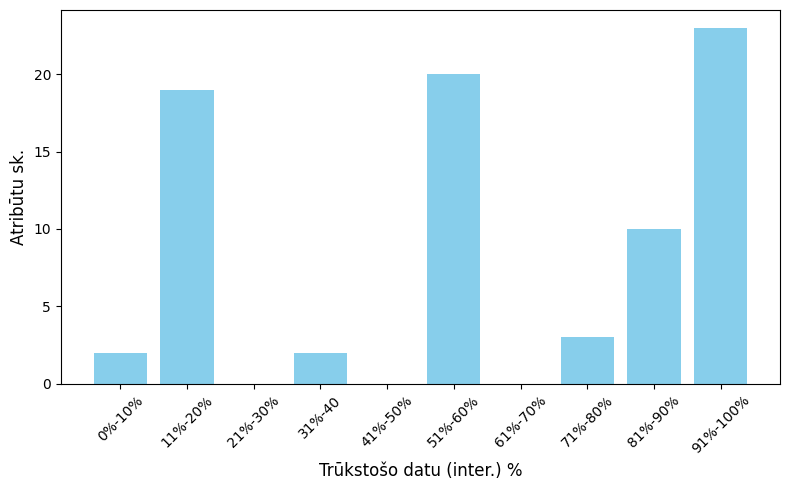

In [16]:
plt.figure(figsize=(8, 5))
plt.bar(missing_val_stat_grouped['Trūkstošo datu (inter.) %'], missing_val_stat_grouped['col_count'], color='skyblue')
plt.xlabel('Trūkstošo datu (inter.) %', fontsize=12)
plt.ylabel('Atribūtu sk.', fontsize=12)
plt.xticks(ha='center', rotation=45)
plt.tight_layout()
plt.show()

In [17]:
columns_to_keep = missing_val_stat[missing_val_stat['Trūkstošo datu %'] < 90]['Atribūti']
len(columns_to_keep)

56

In [21]:
credit_risk_df_vars = credit_risk_df_vars[columns_to_keep]   
credit_risk_df_vars.head()

,Predictor_1,Predictor_2,Predictor_3,Predictor_4,Predictor_5,Predictor_6,Predictor_7,Predictor_8,Predictor_9,Predictor_10,...,Predictor_50,Predictor_51,Predictor_52,Predictor_57,Predictor_67,Predictor_74,Predictor_75,Predictor_76,Predictor_78,Predictor_79
0,1.0,4.0,320.00,80.000,0.00,0.0,0.0,0.0,0.00,4.0,...,NaN,NaN,NaN,NaN,NaN,12.0,5.0,4.0,NaN,NaN
1,2.0,5.0,22087.09,4417.418,0.00,0.0,0.0,0.0,0.00,5.0,...,NaN,NaN,NaN,0.0,NaN,15.0,3.0,4.0,2.0,2.0
2,1.0,1.0,2000.00,2000.000,2070.63,1.0,2000.0,2000.0,2070.63,0.0,...,NaN,NaN,NaN,NaN,NaN,46.0,35.0,5.0,NaN,NaN
3,1.0,1.0,1100.00,1100.000,567.79,1.0,1100.0,1100.0,567.79,0.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN
4,1.0,0.0,0.00,0.000,0.00,1.0,1005.0,1005.0,596.60,0.0,...,NaN,NaN,NaN,0.0,NaN,6.0,1.0,2.0,NaN,NaN


In [19]:
from sklearn.impute import KNNImputer

In [22]:
missing_val_handle = KNNImputer(n_neighbors=5,metric='nan_euclidean')
credit_risk_df_imputed= pd.DataFrame(missing_val_handle.fit_transform(credit_risk_df_vars), columns=credit_risk_df_vars.columns)

In [23]:
credit_risk_df_vars = credit_risk_df_imputed  

In [24]:
credit_risk_df_vars

,Predictor_1,Predictor_2,Predictor_3,Predictor_4,Predictor_5,Predictor_6,Predictor_7,Predictor_8,Predictor_9,Predictor_10,...,Predictor_50,Predictor_51,Predictor_52,Predictor_57,Predictor_67,Predictor_74,Predictor_75,Predictor_76,Predictor_78,Predictor_79
0,1.0,4.0,320.000,80.00000,0.00,0.0,0.00,0.00000,0.000,4.0,...,0.0,0.0,0.6,0.0,0.0,12.0,5.0,4.0,2.8,1.6
1,2.0,5.0,22087.090,4417.41800,0.00,0.0,0.00,0.00000,0.000,5.0,...,0.0,0.0,0.2,0.0,0.4,15.0,3.0,4.0,2.0,2.0
2,1.0,1.0,2000.000,2000.00000,2070.63,1.0,2000.00,2000.00000,2070.630,0.0,...,0.0,0.0,0.0,0.0,0.6,46.0,35.0,5.0,1.8,1.0
3,1.0,1.0,1100.000,1100.00000,567.79,1.0,1100.00,1100.00000,567.790,0.0,...,0.0,0.0,0.0,0.0,0.2,2.0,1.2,1.0,2.8,1.8
4,1.0,0.0,0.000,0.00000,0.00,1.0,1005.00,1005.00000,596.600,0.0,...,0.0,0.0,0.2,0.0,0.2,6.0,1.0,2.0,2.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,8.0,12.0,5736.130,185.03640,1620.37,14.0,42167.68,1360.24770,38792.210,15.0,...,0.0,0.0,0.2,0.0,0.0,146.0,112.4,72.0,2.0,1.2
69996,7.0,2.0,696.430,36.65420,0.00,14.0,14000.00,736.84210,0.000,5.0,...,0.0,0.0,0.2,0.0,0.2,13.0,5.0,2.0,2.2,1.2
69997,3.0,6.0,12311.470,2051.91160,277.49,2.0,584.99,97.49830,277.490,4.0,...,0.0,0.0,0.2,0.0,0.0,57.0,30.0,10.0,2.6,1.8
69998,2.2,1.8,1000.998,225.28200,0.00,3.0,2430.00,263.40658,13345.368,1.4,...,0.0,0.0,0.0,0.0,1.0,10.0,8.0,4.6,2.0,1.0


#### Atribūtu inženierija ar dispersijas slieksni (ir nepiciešama trukstošo datu apstrāde)

In [25]:
from sklearn.feature_selection import VarianceThreshold

In [26]:
def variance_threshold(df,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(df)
    new_cols = var_thres.get_support()
    return df.iloc[:,new_cols]

In [31]:
credit_risk_df_vars_copy = credit_risk_df_vars.copy()
credit_risk_df_vars_copy = variance_threshold(credit_risk_df_vars_copy, 0.3)
credit_risk_df_vars_copy

,Predictor_1,Predictor_2,Predictor_3,Predictor_4,Predictor_5,Predictor_6,Predictor_7,Predictor_8,Predictor_9,Predictor_10,...,Predictor_36,Predictor_37,Predictor_38,Predictor_39,Predictor_40,Predictor_41,Predictor_74,Predictor_75,Predictor_76,Predictor_78
0,1.0,4.0,320.000,80.00000,0.00,0.0,0.00,0.00000,0.000,4.0,...,5.372,4440.2,3019.4,33.0,0.2,0.0,12.0,5.0,4.0,2.8
1,2.0,5.0,22087.090,4417.41800,0.00,0.0,0.00,0.00000,0.000,5.0,...,0.000,14539.8,159.4,52.0,0.4,0.4,15.0,3.0,4.0,2.0
2,1.0,1.0,2000.000,2000.00000,2070.63,1.0,2000.00,2000.00000,2070.630,0.0,...,0.000,19148.6,152.0,36.0,2.2,1.2,46.0,35.0,5.0,1.8
3,1.0,1.0,1100.000,1100.00000,567.79,1.0,1100.00,1100.00000,567.790,0.0,...,0.000,11808.6,381.4,30.0,0.8,0.6,2.0,1.2,1.0,2.8
4,1.0,0.0,0.000,0.00000,0.00,1.0,1005.00,1005.00000,596.600,0.0,...,0.000,0.0,6.0,22.0,1.4,0.8,6.0,1.0,2.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,8.0,12.0,5736.130,185.03640,1620.37,14.0,42167.68,1360.24770,38792.210,15.0,...,0.000,247.0,174.0,32.0,2.0,0.6,146.0,112.4,72.0,2.0
69996,7.0,2.0,696.430,36.65420,0.00,14.0,14000.00,736.84210,0.000,5.0,...,0.000,2787.0,111.0,60.0,0.8,0.2,13.0,5.0,2.0,2.2
69997,3.0,6.0,12311.470,2051.91160,277.49,2.0,584.99,97.49830,277.490,4.0,...,0.000,6078.8,166.4,32.0,0.0,0.0,57.0,30.0,10.0,2.6
69998,2.2,1.8,1000.998,225.28200,0.00,3.0,2430.00,263.40658,13345.368,1.4,...,2.250,25117.2,2956.2,62.0,2.0,2.0,10.0,8.0,4.6,2.0


In [32]:
credit_risk_df_vars = credit_risk_df_vars_copy
credit_risk_df_vars

,Predictor_1,Predictor_2,Predictor_3,Predictor_4,Predictor_5,Predictor_6,Predictor_7,Predictor_8,Predictor_9,Predictor_10,...,Predictor_36,Predictor_37,Predictor_38,Predictor_39,Predictor_40,Predictor_41,Predictor_74,Predictor_75,Predictor_76,Predictor_78
0,1.0,4.0,320.000,80.00000,0.00,0.0,0.00,0.00000,0.000,4.0,...,5.372,4440.2,3019.4,33.0,0.2,0.0,12.0,5.0,4.0,2.8
1,2.0,5.0,22087.090,4417.41800,0.00,0.0,0.00,0.00000,0.000,5.0,...,0.000,14539.8,159.4,52.0,0.4,0.4,15.0,3.0,4.0,2.0
2,1.0,1.0,2000.000,2000.00000,2070.63,1.0,2000.00,2000.00000,2070.630,0.0,...,0.000,19148.6,152.0,36.0,2.2,1.2,46.0,35.0,5.0,1.8
3,1.0,1.0,1100.000,1100.00000,567.79,1.0,1100.00,1100.00000,567.790,0.0,...,0.000,11808.6,381.4,30.0,0.8,0.6,2.0,1.2,1.0,2.8
4,1.0,0.0,0.000,0.00000,0.00,1.0,1005.00,1005.00000,596.600,0.0,...,0.000,0.0,6.0,22.0,1.4,0.8,6.0,1.0,2.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,8.0,12.0,5736.130,185.03640,1620.37,14.0,42167.68,1360.24770,38792.210,15.0,...,0.000,247.0,174.0,32.0,2.0,0.6,146.0,112.4,72.0,2.0
69996,7.0,2.0,696.430,36.65420,0.00,14.0,14000.00,736.84210,0.000,5.0,...,0.000,2787.0,111.0,60.0,0.8,0.2,13.0,5.0,2.0,2.2
69997,3.0,6.0,12311.470,2051.91160,277.49,2.0,584.99,97.49830,277.490,4.0,...,0.000,6078.8,166.4,32.0,0.0,0.0,57.0,30.0,10.0,2.6
69998,2.2,1.8,1000.998,225.28200,0.00,3.0,2430.00,263.40658,13345.368,1.4,...,2.250,25117.2,2956.2,62.0,2.0,2.0,10.0,8.0,4.6,2.0


#### Atribūtu inženierija ar Informācijas iegūšanu (nepieciešama trukstošo datu aizpilde)

In [33]:
from sklearn.feature_selection import mutual_info_classif

In [34]:
X = credit_risk_df_vars
y = credit_risk_df['Target']

In [35]:
info_gain = mutual_info_classif(X, y, discrete_features=False)

In [36]:
info_gain_df = pd.DataFrame({
    'Atribūti': X.columns,
    'Informācijas iegūšanas koef.': info_gain
}).sort_values(by='Informācijas iegūšanas koef.', ascending=False)
info_gain_df

,Atribūti,Informācijas iegūšanas koef.
5,Predictor_6,0.072772
23,Predictor_25,0.063665
17,Predictor_19,0.062899
29,Predictor_31,0.061801
8,Predictor_9,0.058700
31,Predictor_33,0.058326
30,Predictor_32,0.057690
6,Predictor_7,0.057354
24,Predictor_26,0.056064
19,Predictor_21,0.053722


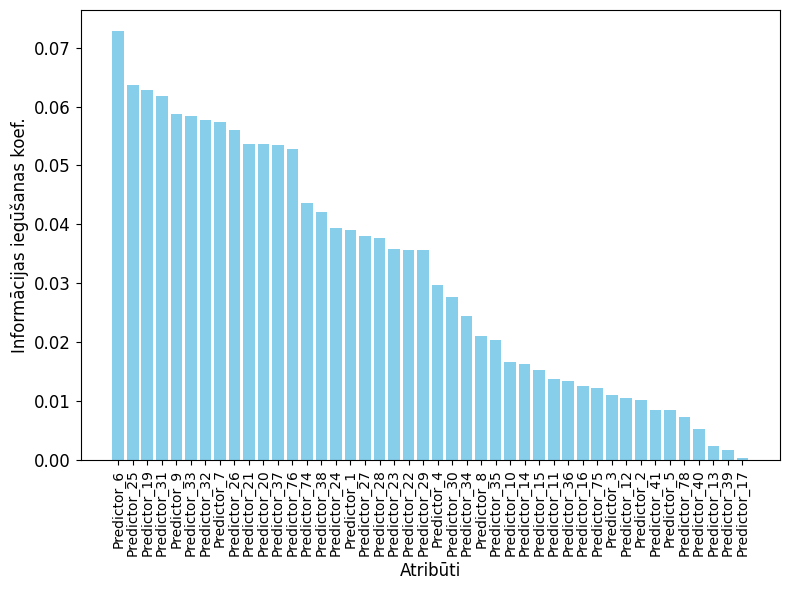

In [37]:
plt.figure(figsize=(8, 6))
plt.bar(info_gain_df['Atribūti'], info_gain_df['Informācijas iegūšanas koef.'], color='skyblue')
plt.xlabel('Atribūti', fontsize=12)
plt.ylabel('Informācijas iegūšanas koef.', fontsize=12)
plt.xticks(ha='center', rotation=90)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [38]:
columns_to_keep_IG = info_gain_df[info_gain_df['Informācijas iegūšanas koef.'] > 0.01]['Atribūti']
len(columns_to_keep_IG)

37

In [39]:
credit_risk_df_vars = credit_risk_df_vars[columns_to_keep_IG]

#### Atribūtu inženierija ar PCA (ir nepiciešama trukstošo datu apstrāde)

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# credit_risk_df_vars_copy = credit_risk_df_vars.copy()
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(credit_risk_df_vars_copy)
# pca = PCA(n_components=2) 
# principal_components = pca.fit_transform(scaled_data)
# principalDf = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
# principalDf
# principalDf
# print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# pca_df.head()

#### Atribūtu korelācijas aprēķins un atribūtu ar lielo savstarpējo korelāciju dzēšana (nepieciešama trukstošo datu apstrāde)

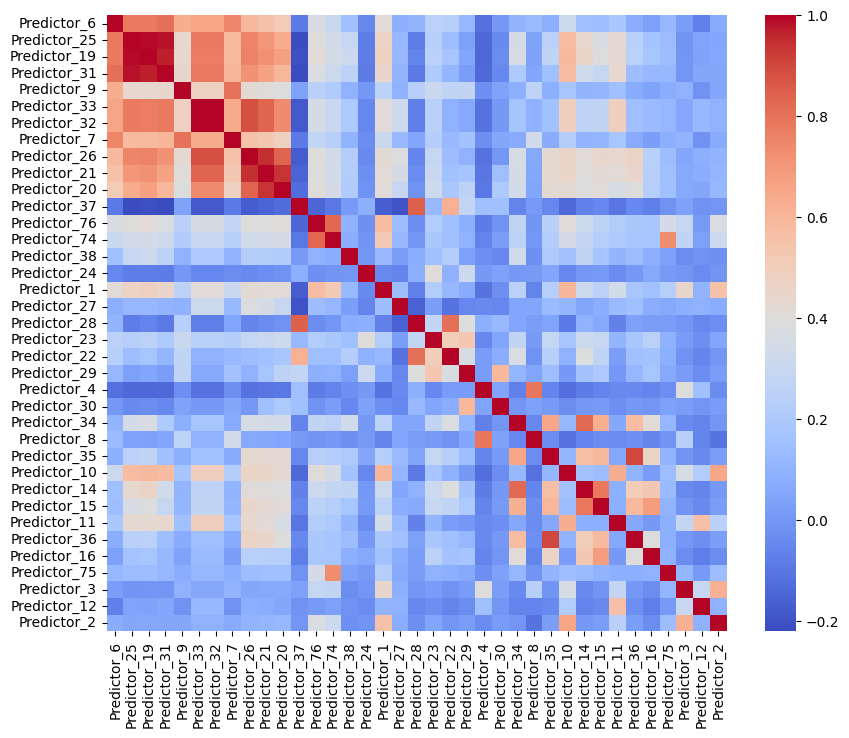

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(credit_risk_df_vars.corr(), cmap='coolwarm')
plt.show()

In [41]:
high_corr_pairs = set()
for i in range(len(credit_risk_df_vars.corr().columns)):
    for j in range(i):
        if abs(credit_risk_df_vars.corr().iloc[i, j]) >= 0.7:
            colname = credit_risk_df_vars.corr().columns[i]
            high_corr_pairs.add(colname)

In [42]:
len(high_corr_pairs)

17

In [43]:
credit_risk_df_vars = credit_risk_df_vars.drop(columns=high_corr_pairs)
credit_risk_df_vars

,Predictor_6,Predictor_9,Predictor_37,Predictor_76,Predictor_38,Predictor_24,Predictor_1,Predictor_27,Predictor_23,Predictor_29,Predictor_4,Predictor_30,Predictor_34,Predictor_35,Predictor_10,Predictor_11,Predictor_16,Predictor_3,Predictor_12,Predictor_2
0,0.0,0.000,4440.2,4.0,3019.4,27.33000,1.0,10.17916,80.482,59.796,80.00000,0.000,0.4,26.058,4.0,320.000,0.0,320.000,80.00000,4.0
1,0.0,0.000,14539.8,4.0,159.4,14.94662,2.0,7.28800,134.508,134.508,4417.41800,0.000,0.0,0.000,5.0,22087.090,0.0,22087.090,4417.41800,5.0
2,1.0,2070.630,19148.6,5.0,152.0,103.25486,1.0,0.00000,725.706,3022.016,2000.00000,1102.760,0.2,20.686,0.0,0.000,0.0,2000.000,0.00000,1.0
3,1.0,567.790,11808.6,1.0,381.4,157.08512,1.0,1.30400,558.868,583.232,1100.00000,0.086,0.0,0.000,0.0,0.000,0.0,1100.000,0.00000,1.0
4,1.0,596.600,0.0,2.0,6.0,0.00000,1.0,49.73000,0.000,0.000,0.00000,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,14.0,38792.210,247.0,72.0,174.0,215.95730,8.0,127.58000,4103.190,934.600,185.03640,0.000,0.0,0.000,15.0,4866.130,0.0,5736.130,156.97190,12.0
69996,14.0,0.000,2787.0,2.0,111.0,19.12050,7.0,46.65230,325.050,325.050,36.65420,0.000,0.0,0.000,5.0,2528.790,0.0,696.430,133.09420,2.0
69997,2.0,277.490,6078.8,10.0,166.4,213.72732,3.0,2.78600,596.604,2917.278,2051.91160,1102.846,0.2,20.686,4.0,11726.480,0.0,12311.470,1954.41330,6.0
69998,3.0,13345.368,25117.2,4.6,2956.2,50.69306,2.2,19.51616,1262.706,1235.100,225.28200,6.860,0.2,55.500,1.4,575.998,200.0,1000.998,116.10616,1.8


#### Anomālo vērtību atrašana un dzēšana (ir nepiciešama trukstošo datu apstrāde)

In [44]:
from scipy.stats import zscore

In [45]:
z_scores = credit_risk_df_vars.apply(zscore)
z_scores

,Predictor_6,Predictor_9,Predictor_37,Predictor_76,Predictor_38,Predictor_24,Predictor_1,Predictor_27,Predictor_23,Predictor_29,Predictor_4,Predictor_30,Predictor_34,Predictor_35,Predictor_10,Predictor_11,Predictor_16,Predictor_3,Predictor_12,Predictor_2
0,-0.473402,-0.287614,-0.095133,-0.473491,1.043790,-0.209191,-0.883760,-0.369891,-0.313061,-0.392056,-0.390694,-0.268369,-0.113723,-0.172625,-0.205195,-0.302135,-0.227730,-0.578826,-0.406398,-0.112550
1,-0.473402,-0.287614,1.208935,-0.473491,-0.368918,-0.274539,-0.426611,-0.392127,-0.273830,-0.333550,1.962320,-0.268369,-0.228333,-0.197723,-0.103862,1.049680,-0.227730,2.578539,6.020310,0.044382
2,-0.374321,-0.219916,1.804027,-0.436145,-0.372574,0.191468,-0.883760,-0.448178,0.155474,1.927628,0.650890,2.744614,-0.171028,-0.177799,-0.610526,-0.322008,-0.227730,-0.335138,-0.524933,-0.583347
3,-0.374321,-0.269050,0.856281,-0.585528,-0.259261,0.475533,-0.883760,-0.438149,0.034323,0.017841,0.162647,-0.268134,-0.228333,-0.197723,-0.610526,-0.322008,-0.227730,-0.465685,-0.524933,-0.583347
4,-0.374321,-0.268108,-0.668455,-0.548182,-0.444691,-0.353413,-0.883760,-0.065712,-0.371504,-0.438882,-0.434094,-0.268369,-0.228333,-0.197723,-0.610526,-0.322008,-0.227730,-0.625242,-0.524933,-0.740279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.913738,0.980667,-0.636562,2.066018,-0.361707,0.786205,2.316288,0.533021,2.608062,0.292994,-0.333713,-0.268369,-0.228333,-0.197723,0.909466,-0.019804,-0.227730,0.206796,-0.292350,1.142907
69996,0.913738,-0.287614,-0.308595,-0.548182,-0.392826,-0.252513,1.859138,-0.089382,-0.135466,-0.184339,-0.414209,-0.268369,-0.228333,-0.197723,-0.103862,-0.164961,-0.227730,-0.524224,-0.327729,-0.426414
69997,-0.275239,-0.278541,0.116444,-0.249417,-0.365461,0.774437,0.030539,-0.426751,0.061725,1.845609,0.679052,2.744849,-0.171028,-0.177799,-0.205195,0.406249,-0.227730,1.160564,2.370901,0.201314
69998,-0.176158,0.148703,2.574698,-0.451083,1.012572,-0.085903,-0.335181,-0.298082,0.545421,0.528312,-0.311880,-0.249626,-0.171028,-0.144268,-0.468660,-0.286237,0.345116,-0.480045,-0.352900,-0.457801


In [46]:
min_max_val = z_scores.apply(lambda x: (min(x), max(x)), axis=0)
min_max_df = min_max_val.T 
min_max_df.columns = ['Min', 'Max'] 

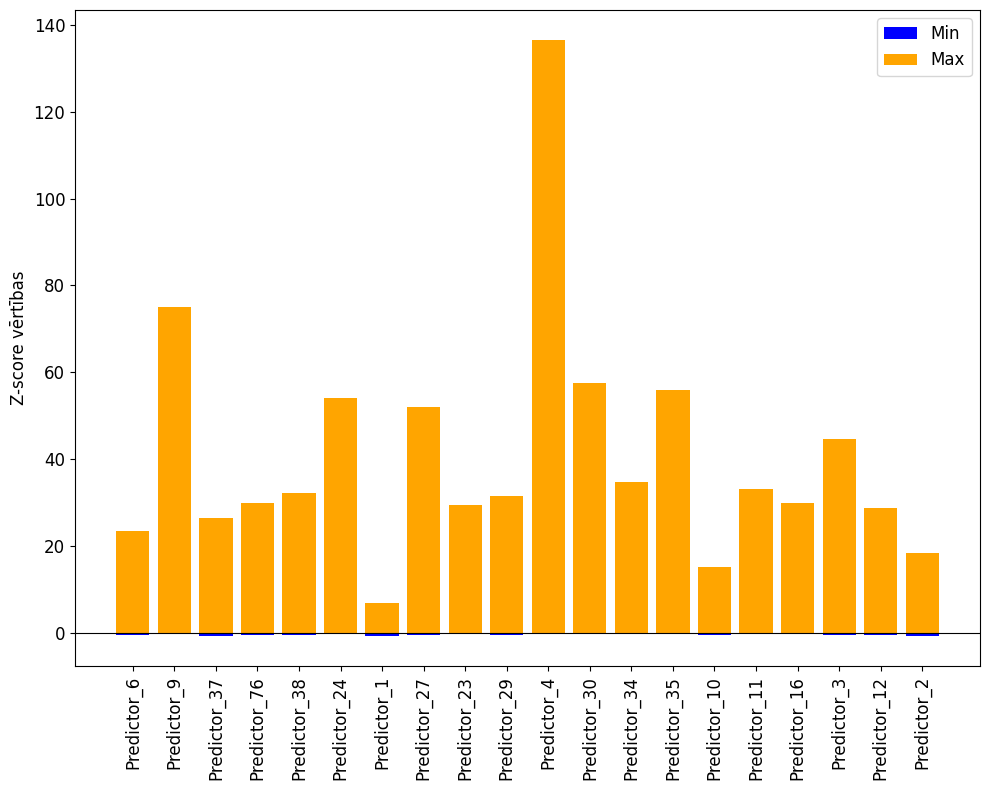

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(min_max_df.index, min_max_df['Min'], color='blue', label='Min')
ax.bar(min_max_df.index, min_max_df['Max'], color='orange', label='Max')
ax.set_ylabel('Z-score vērtības', fontsize=12)
ax.axhline(0, color='black', linewidth=0.8)  
ax.legend(fontsize = 12)
plt.xticks(rotation=90, ha='center', fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

In [48]:
outliers = (z_scores.abs() > 40).any(axis=1)
anomalous_data = credit_risk_df_vars[outliers]
anomalous_data

,Predictor_6,Predictor_9,Predictor_37,Predictor_76,Predictor_38,Predictor_24,Predictor_1,Predictor_27,Predictor_23,Predictor_29,Predictor_4,Predictor_30,Predictor_34,Predictor_35,Predictor_10,Predictor_11,Predictor_16,Predictor_3,Predictor_12,Predictor_2
3591,22.0,181256.68,524.0,13.0,878.0,72.38680,1.0,1186.36400,1592.510,27715.550,0.0000,19476.610,0.0,0.000,0.0,0.00,0.0000,0.00,0.0000,0.0
4143,70.0,2306064.60,75572.0,3.0,0.0,467.22420,1.0,0.00000,32705.700,32705.700,0.0000,0.000,0.0,0.000,0.0,0.00,0.0000,0.00,0.0000,0.0
4669,1.0,69717.40,649.6,1.0,691.2,1.58120,1.0,5.45800,7.906,7.906,82600.0000,0.000,0.2,55.500,0.0,0.00,0.0000,82600.00,0.0000,1.0
7702,35.0,190477.00,238.0,11.0,1718.0,78.90330,2.0,714.21540,3313.940,26594.590,0.0000,21152.390,4.0,623.440,0.0,0.00,307.6923,0.00,0.0000,0.0
10838,1.0,76613.76,19746.2,4.4,360.4,107.42056,1.0,3.45400,607.732,621.216,120000.0000,5.982,0.0,0.000,0.0,0.00,0.0000,120000.00,0.0000,1.0
14284,1.0,8875.38,2241.0,1.0,0.0,8858.38000,1.0,0.00000,8858.380,8858.380,0.0000,0.000,0.0,0.000,0.0,0.00,0.0000,0.00,0.0000,0.0
15202,1.0,8145.82,2004.0,7.6,0.0,8517.10000,1.0,0.00000,8517.100,8517.100,0.0000,0.000,0.0,0.000,0.0,0.00,0.0000,0.00,0.0000,0.0
16230,0.0,0.00,0.0,22.0,80.0,0.00000,2.0,5586.13000,0.000,0.000,126.6666,0.000,0.0,0.000,3.0,5600.00,0.0000,380.00,1866.6666,2.0
27721,1.0,8215.97,2311.0,4.0,0.0,8198.97000,1.0,0.00000,8198.970,8198.970,0.0000,0.000,0.0,0.000,0.0,0.00,0.0000,0.00,0.0000,0.0
28193,1.0,72641.29,12384.8,1.0,4397.0,92.65940,1.0,7.32066,484.238,484.238,252588.0000,0.000,0.0,0.000,0.0,0.00,0.0000,252588.00,0.0000,1.0


In [49]:
credit_risk_df_vars = credit_risk_df_vars[~credit_risk_df_vars.index.isin(anomalous_data.index)]

In [50]:
credit_risk_df = credit_risk_df[~credit_risk_df.index.isin(anomalous_data.index)]

In [51]:
credit_risk_df_final = pd.concat([credit_risk_df['Target'], credit_risk_df_vars], axis=1)

In [52]:
credit_risk_df_final

,Target,Predictor_6,Predictor_9,Predictor_37,Predictor_76,Predictor_38,Predictor_24,Predictor_1,Predictor_27,Predictor_23,...,Predictor_4,Predictor_30,Predictor_34,Predictor_35,Predictor_10,Predictor_11,Predictor_16,Predictor_3,Predictor_12,Predictor_2
0,0,0.0,0.000,4440.2,4.0,3019.4,27.33000,1.0,10.17916,80.482,...,80.00000,0.000,0.4,26.058,4.0,320.000,0.0,320.000,80.00000,4.0
1,0,0.0,0.000,14539.8,4.0,159.4,14.94662,2.0,7.28800,134.508,...,4417.41800,0.000,0.0,0.000,5.0,22087.090,0.0,22087.090,4417.41800,5.0
2,0,1.0,2070.630,19148.6,5.0,152.0,103.25486,1.0,0.00000,725.706,...,2000.00000,1102.760,0.2,20.686,0.0,0.000,0.0,2000.000,0.00000,1.0
3,1,1.0,567.790,11808.6,1.0,381.4,157.08512,1.0,1.30400,558.868,...,1100.00000,0.086,0.0,0.000,0.0,0.000,0.0,1100.000,0.00000,1.0
4,0,1.0,596.600,0.0,2.0,6.0,0.00000,1.0,49.73000,0.000,...,0.00000,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1,14.0,38792.210,247.0,72.0,174.0,215.95730,8.0,127.58000,4103.190,...,185.03640,0.000,0.0,0.000,15.0,4866.130,0.0,5736.130,156.97190,12.0
69996,0,14.0,0.000,2787.0,2.0,111.0,19.12050,7.0,46.65230,325.050,...,36.65420,0.000,0.0,0.000,5.0,2528.790,0.0,696.430,133.09420,2.0
69997,0,2.0,277.490,6078.8,10.0,166.4,213.72732,3.0,2.78600,596.604,...,2051.91160,1102.846,0.2,20.686,4.0,11726.480,0.0,12311.470,1954.41330,6.0
69998,0,3.0,13345.368,25117.2,4.6,2956.2,50.69306,2.2,19.51616,1262.706,...,225.28200,6.860,0.2,55.500,1.4,575.998,200.0,1000.998,116.10616,1.8


In [ ]:
# columns_to_plot = credit_risk_df_vars.columns[:40]  
# num_cols = 5  
# num_rows = -(-len(columns_to_plot) // num_cols) 

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15), constrained_layout=True)
# axes = axes.flatten()

# for i, col in enumerate(columns_to_plot):
#     sns.boxplot(data=credit_risk_df[col], ax=axes[i], color='skyblue')
#     axes[i].set_title(col, fontsize=10)
#     axes[i].set_xlabel('')
#     axes[i].set_ylabel('')


# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# # plt.suptitle('Boxplots for 40 Columns', fontsize=16)
# plt.show()

#### Pārveidotas un analizētas datu kopas saglabāšana

In [53]:
credit_risk_df_final.to_csv('credit_risk_df_final.csv', index=False)